In [ ]:
!pip install dask
!pip install graphviz

In [ ]:
import dask.array as da

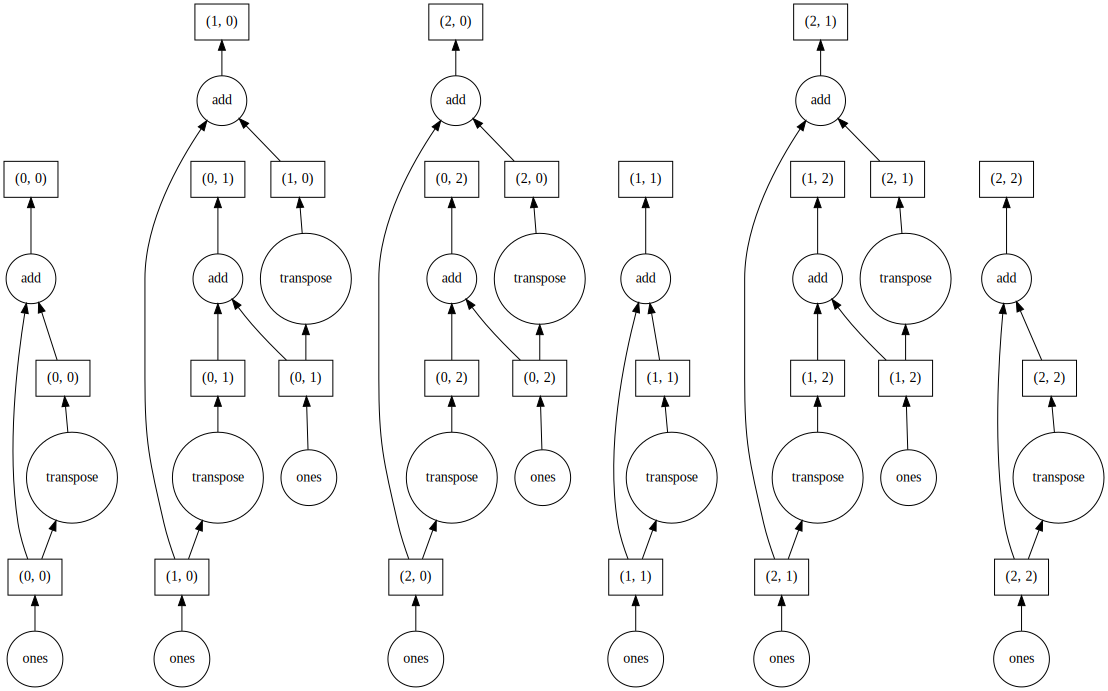

In [ ]:
x = da.ones((15,15), chunks =(5,5))

y = x + x.T

#y.compute()
y.visualize(filename = 'transpose.svg')

In [ ]:
import multiprocessing 
import os
def print_cube(num): 
    """ 
    function to print cube of given num 
    """
    print(os.getpid())
    print("Cube: {}".format(num * num * num)) 

def print_square(num): 
    """ 
    function to print square of given num 
    """
    print(os.getpid())
    print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
    # creating processes 
    p1 = multiprocessing.Process(target=print_square, args=(10, )) 
    p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

    # starting process 1 
    p1.start() 
    # starting process 2 
    p2.start() 

    # wait until process 1 is finished 
    p1.join() 
    # wait until process 2 is finished 
    p2.join() 

    # both processes finished 
    print("Done!")

118
121
Square: 100
Cube: 1000
Done!


In [ ]:
from time import sleep

def apply_discount(x):
  sleep(1)
  x = x - 0.3*x
  return x

def get_total(a,b):
  sleep(1)
  return a+b

def total_price(x,y):
  sleep(1)
  a = apply_discount(x)
  b = apply_discount(y)
  get_total(a,b)

In [ ]:
%%time
a = apply_discount(1000)
b = apply_discount(4000)
c = get_total(a,b)

CPU times: user 15.7 ms, sys: 1.25 ms, total: 17 ms
Wall time: 3 s


In [ ]:
%%time
import dask
from dask import delayed

x = delayed(apply_discount)(1000)
y = delayed(apply_discount)(4000)
z = delayed(total_price)(x, y)

z.compute()

CPU times: user 29.5 ms, sys: 11.4 ms, total: 40.8 ms
Wall time: 5.01 s


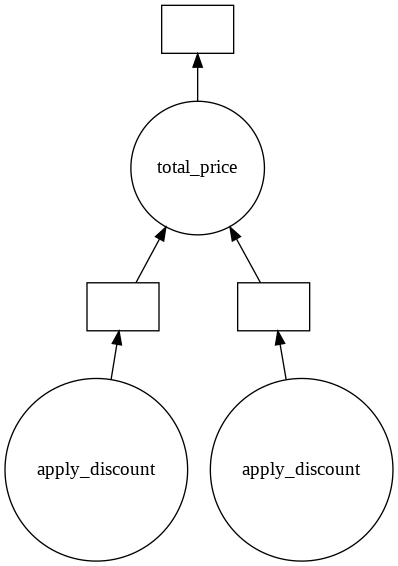

In [ ]:
z.visualize()

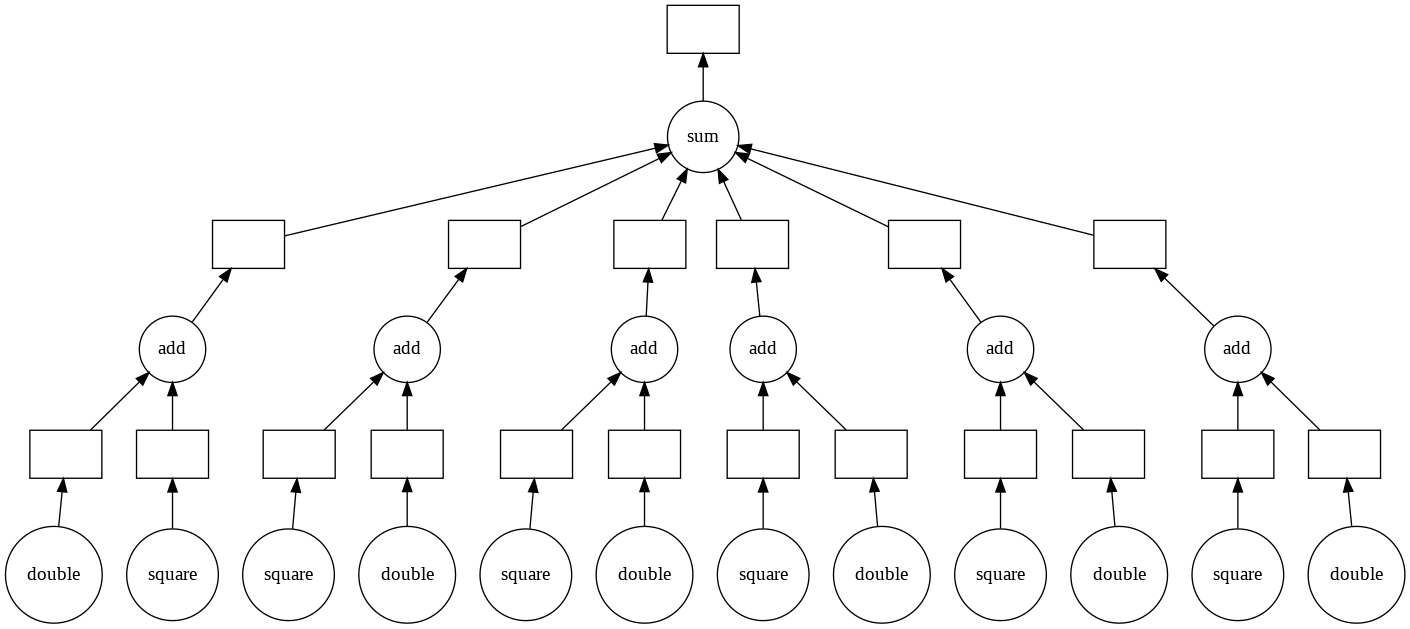

In [ ]:
@delayed
def square(x):
  return x*x
@delayed
def double(x):
  return x*2
@delayed
def add(x, y):
  return x + y



# For loop that calls the above functions for each data
output = []
for i in range(6):
  a = square(i)
  b = double(i)
  c = add(a, b)
  output.append(c)

total = delayed(sum)(output)
total.visualize()

In [ ]:
!pip install 'fsspec>=0.3.3'
import dask.dataframe as dd

     |████████████████████████████████| 112kB 16.5MB/s 


In [ ]:
import concurrent
import multiprocessing
multiprocessing.cpu_count()

2

In [ ]:
dask.__version__

'2.12.0'

In [ ]:
df = dask.datasets.timeseries()
df

,id,name,x,y
npartitions=30,,,,
2000-01-01,int64,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [ ]:
df.head()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1036,Norbert,-0.074737,0.081966
2000-01-01 00:00:01,961,Laura,0.106941,-0.512960
2000-01-01 00:00:02,994,Frank,0.490959,-0.166484
2000-01-01 00:00:03,999,Hannah,0.847769,0.936195
2000-01-01 00:00:04,989,Victor,-0.240649,0.739428


In [ ]:
df1 = df.groupby('name').y.std()
df1

Dask Series Structure:
npartitions=1
    float64
        ...
Name: y, dtype: float64
Dask Name: sqrt, 67 tasks

In [ ]:
df1.compute()

name
Alice       0.576567
Bob         0.577724
Charlie     0.578363
Dan         0.576539
Edith       0.575291
Frank       0.577651
George      0.577214
Hannah      0.577229
Ingrid      0.576625
Jerry       0.575807
Kevin       0.576295
Laura       0.577006
Michael     0.577325
Norbert     0.576898
Oliver      0.576719
Patricia    0.576845
Quinn       0.576071
Ray         0.577274
Sarah       0.578257
Tim         0.577318
Ursula      0.577728
Victor      0.577108
Wendy       0.575852
Xavier      0.577399
Yvonne      0.577360
Zelda       0.576619
Name: y, dtype: float64

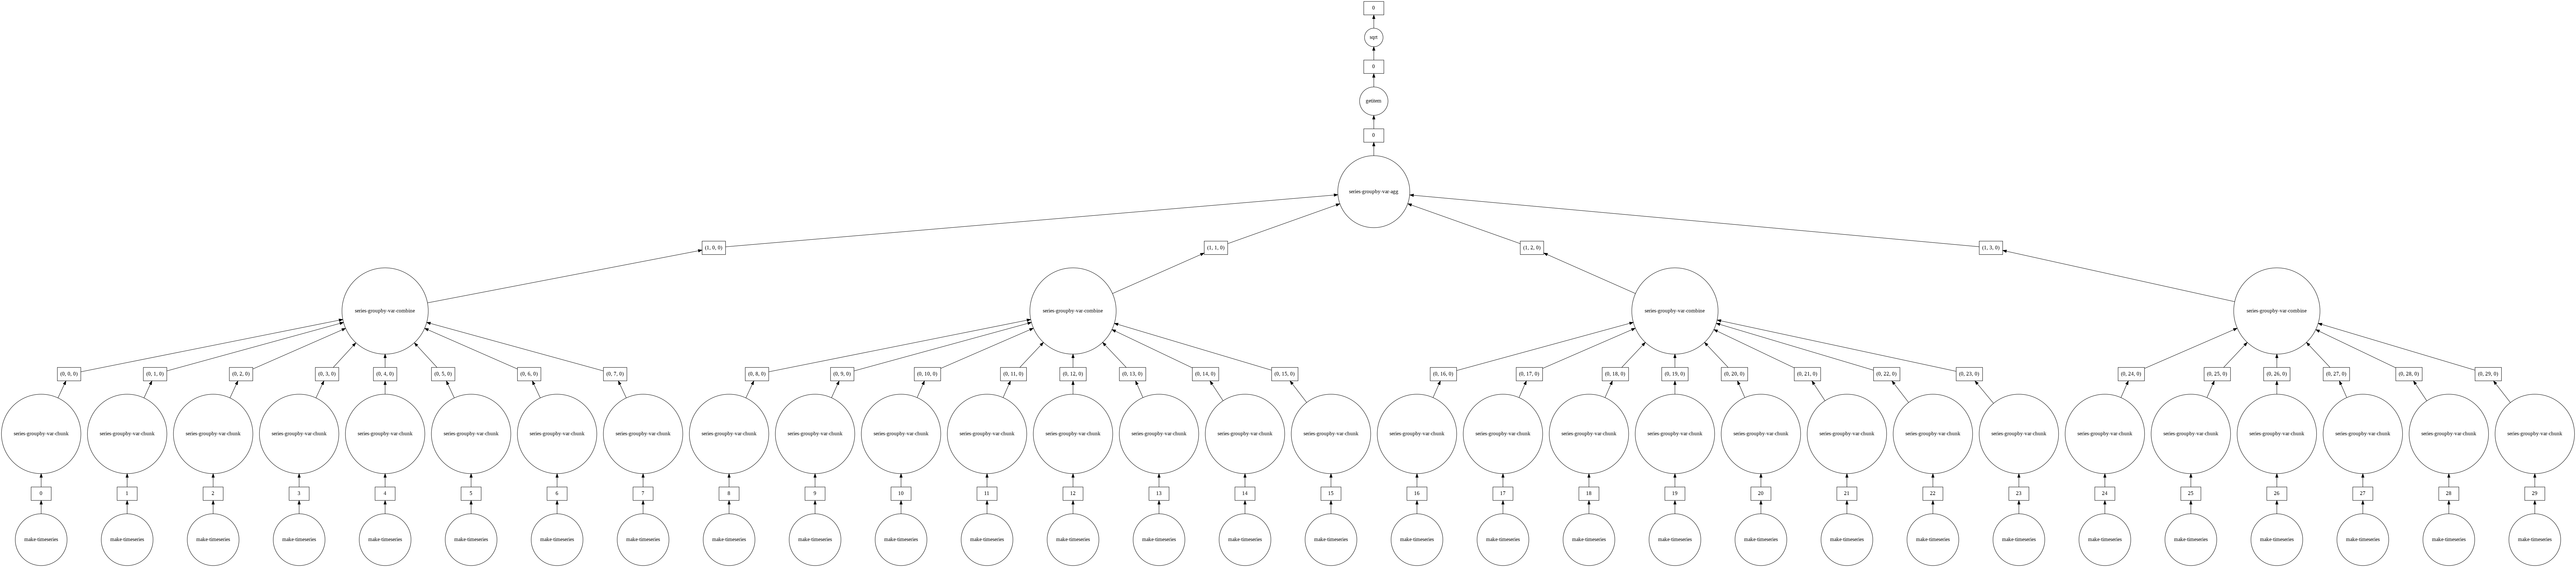

In [ ]:
df1.visualize()

In [ ]:
%%time
df.loc['2000-01-01']

CPU times: user 7.1 ms, sys: 855 µs, total: 7.96 ms
Wall time: 8.13 ms


,id,name,x,y
npartitions=1,,,,
2000-01-01 00:00:00.000000000,int64,object,float64,float64
2000-01-01 23:59:59.999999999,...,...,...,...


In [ ]:
df = df.persist()

In [ ]:
%time
df.loc['2000-01-01'].compute()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.54 µs


,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1036,Norbert,-0.074737,0.081966
2000-01-01 00:00:01,961,Laura,0.106941,-0.512960
2000-01-01 00:00:02,994,Frank,0.490959,-0.166484
2000-01-01 00:00:03,999,Hannah,0.847769,0.936195
2000-01-01 00:00:04,989,Victor,-0.240649,0.739428
...,...,...,...,...
2000-01-01 23:59:55,951,Michael,0.201488,-0.171535
2000-01-01 23:59:56,1034,George,-0.061301,0.031323
2000-01-01 23:59:57,1008,Tim,-0.007932,0.652456


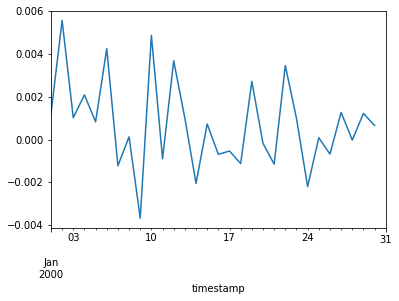

In [ ]:
%matplotlib inline
df['y'].resample('24h').mean().compute().plot()

In [ ]:
len(df)

2592000

In [ ]:
from dask.distributed import Client
import pandas as pd
import time
import numpy as np

In [ ]:
client = Client(processes = False)

In [ ]:
client

In [ ]:
df = pd.DataFrame(np.random.random(size=(10000000, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
df.head()

,param_a,param_b,param_c,param_d
0,0.763266,0.016110,0.147491,0.521336
1,0.867784,0.548161,0.435163,0.600323
2,0.366408,0.005889,0.557085,0.741384
3,0.997783,0.461363,0.408321,0.822103
4,0.396532,0.136652,0.391681,0.722402


In [ ]:
def costly_simulation(list_param):
    time.sleep(3)
    return sum(list_param)

In [ ]:
%%time
results = []
for col in df.columns:
    result = costly_simulation(df[col].values)
    results.append(result)

CPU times: user 8.13 s, sys: 197 ms, total: 8.33 s
Wall time: 19.1 s


In [ ]:
results

[5001144.634150753, 5000148.11590711, 4998938.40073271, 5000484.897475558]

In [ ]:
%%time
results = []
for col in df.columns:
    result =dask.delayed(costly_simulation)(df[col].values)
    results.append(result)

CPU times: user 890 µs, sys: 851 µs, total: 1.74 ms
Wall time: 1.52 ms


In [ ]:
results[0]

Delayed('costly_simulation-a62bde29-30e0-483c-a28d-4546c3504887')

In [ ]:
%time dask.compute(*results)

/usr/local/lib/python3.7/dist-packages/distributed/worker.py:2791: UserWarning: Large object of size 80.00 MB detected in task graph: 
  (array([0.52133581, 0.60032324, 0.74138419, ..., 0 ...  0.86369771]),)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s))
